## 実施概要

- 年齢と血液型のダミーデータを使用
- 年齢のみと年齢と血液型の組み合わせのダミーデータでそれぞれクラスタリングを実施
  - 階層クラスタリング
  - k-meansクラスタリング

## 結論

- 階層クラスタリングはk-meansクラスタリングより精度が高い
- 階層クラスタリングはk-meansクラスタリングよりめもりせんy

In [33]:
import pandas as pd

df = pd.read_csv('./datasets/personal_infomation.csv', index_col=0)

In [34]:
ddf = pd.DataFrame()
for bottom in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    ddf[f'{bottom}<age<={bottom+10}'] = ((df['年齢'] > bottom) & (df['年齢'] <= bottom+10)).astype('int8')

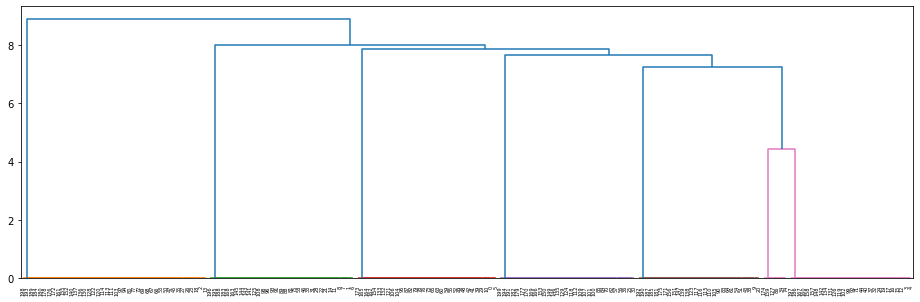

In [35]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

z = linkage(ddf, 'ward')

fig = plt.subplots(figsize=(16, 5))
dn = dendrogram(z)

In [38]:
from scipy.cluster.hierarchy import fcluster
rdf = ddf.copy()
rdf['cls'] = fcluster(z, 1)

In [39]:
rdf[rdf['cls'] == 1]

,0<age<=10,10<age<=20,20<age<=30,30<age<=40,40<age<=50,50<age<=60,60<age<=70,70<age<=80,80<age<=90,90<age<=100,100<age<=110,cls
連番,,,,,,,,,,,,
3,0,1,0,0,0,0,0,0,0,0,0,1
14,0,1,0,0,0,0,0,0,0,0,0,1
19,0,1,0,0,0,0,0,0,0,0,0,1
24,0,1,0,0,0,0,0,0,0,0,0,1
27,0,1,0,0,0,0,0,0,0,0,0,1
28,0,1,0,0,0,0,0,0,0,0,0,1
36,0,1,0,0,0,0,0,0,0,0,0,1
46,0,1,0,0,0,0,0,0,0,0,0,1
48,0,1,0,0,0,0,0,0,0,0,0,1


In [40]:
blood_type_df = pd.get_dummies(df[['血液型']])
bddf = ddf.copy()
bddf[blood_type_df.columns] = blood_type_df.values

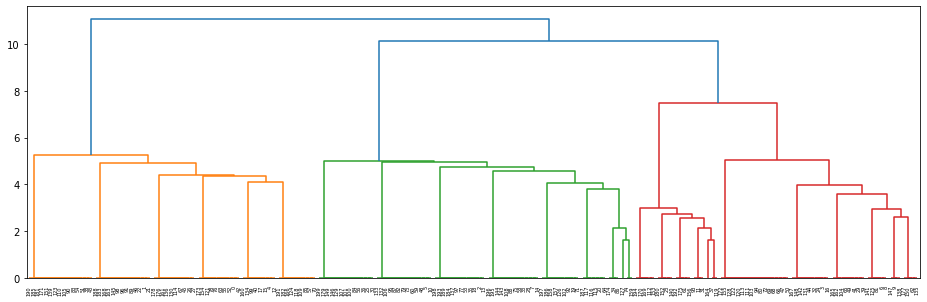

In [41]:
z = linkage(bddf, 'ward')

fig = plt.subplots(figsize=(16, 5))
dn = dendrogram(z)

In [42]:
brdf = bddf.copy()
brdf['cls'] = fcluster(z, 1)

In [46]:
brdf

,0<age<=10,10<age<=20,20<age<=30,30<age<=40,40<age<=50,50<age<=60,60<age<=70,70<age<=80,80<age<=90,90<age<=100,100<age<=110,血液型_A,血液型_AB,血液型_B,血液型_O,cls
連番,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,10
5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,7
197,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,7
198,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,7


<BarContainer object of 14 artists>

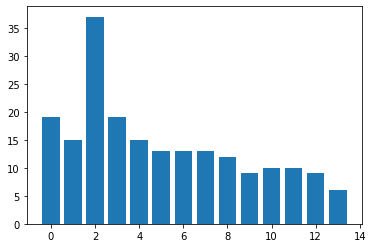

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=max(brdf['cls'].unique()), random_state=0)
kmeans.fit(bddf)

bar_x, bar_y = np.unique(kmeans.labels_, return_counts=True)
plt.bar(bar_x, bar_y)

In [48]:
brdf['kcls'] = kmeans.labels_

In [50]:
brdf[brdf['kcls'] == 0]

,0<age<=10,10<age<=20,20<age<=30,30<age<=40,40<age<=50,50<age<=60,60<age<=70,70<age<=80,80<age<=90,90<age<=100,100<age<=110,血液型_A,血液型_AB,血液型_B,血液型_O,cls,kcls
連番,,,,,,,,,,,,,,,,,
5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5,0
13,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5,0
16,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5,0
18,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5,0
41,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5,0
58,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,6,0
71,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,6,0
75,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0
86,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,6,0
